# Selección del modelo ganador

En este notebook se van a comparar las diferentes matrcies de confusión y las curvas ROC de todos los modelos que se han descrito para este estudio. Se tendrán en cuenta todas estas medidas y valores para tomar la decisión de cuál es el modelo elegido, teniendo en cuenta tambuién el conocimiento de negocio.


- Libraries Import
- Data Import
- Models Import
- Confusion Matrix
- Best Model
- Hyperparamtres
- Conclussion
- References
    

__Importamos todas las librerías que se van a utilizar en este notebook:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing 
from sklearn.linear_model import Lasso, LassoCV
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # SVM
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

__Importamos los datos__

In [4]:
X_train = pd.read_csv('../data/03_processed/x_train.csv')
X_train.head()

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,0,0.0,0.019016,0.005816,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.005681,0.100000,1.0,1.000000,0.000000,0.0,0.114286,1.0
1,1,0.0,0.006348,0.002303,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.021957,0.144444,0.0,1.000000,0.000000,0.0,0.028571,1.0
2,2,0.0,0.033903,0.002861,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.037994,0.100000,1.0,1.000000,0.000000,0.0,0.071429,1.0
3,3,0.0,0.005288,0.001968,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.013582,0.100000,0.0,0.537190,0.011628,0.0,0.114286,1.0
4,4,0.0,0.008973,0.001241,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.024805,0.088889,1.0,0.198347,0.011628,0.0,0.257143,1.0


In [5]:
del X_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [6]:
X_test = pd.read_csv('../data/03_processed/x_test.csv')
X_test.head()

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,137093,0.0,0.005378,0.004647,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.272222,0.011176,0.077778,0.0,1.0,0.0,0.0,0.100000,1.0
1,34771,0.0,0.004796,0.007528,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.450000,0.011844,0.100000,0.0,1.0,0.0,0.0,0.085714,1.0
2,71711,0.0,0.005021,0.005028,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.015285,0.133333,1.0,1.0,0.0,0.0,0.100000,1.0
3,316353,0.0,0.034286,0.009615,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.122222,0.019613,0.088889,1.0,1.0,0.0,0.0,0.071429,1.0
4,71271,0.0,0.021202,0.008591,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.024168,0.166667,1.0,1.0,0.0,0.0,0.157143,1.0


In [7]:
del X_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [8]:
Y_test = pd.read_csv('../data/03_processed/y_test.csv')

In [9]:
del Y_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [10]:
Y_train = pd.read_csv('../data/03_processed/Y_train.csv')

In [11]:
del Y_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

__Importamos los modelos:__

Importamos los modelos que se han guardado como un objeto en pickle desde la ruta seleccionada.

In [10]:
null =  pd.read_pickle('../data/04_models/null_model.pkl')

In [11]:
logit =  pd.read_pickle('../data/04_models/logit_model.pkl')

In [12]:
svm =  pd.read_pickle('../data/04_models/svm_model.pkl')

In [13]:
random_forest =  pd.read_pickle('../data/04_models/random_forest.pkl')

In [14]:
xg_boost =  pd.read_pickle('../data/04_models/xg_boost.pkl')

### Matriz de Confusión:
La matriz de confusión de un problema de clase n es una matríz nxnen la que las filas se nombran según las clases reales y las columnas, según las clases previstas por el modelo. Sirve para mostrar de forma explícita cuándo una clase es confundida con otra

__Accuracy:__ Es el porcentaje total de elementos clasificados correctamente.

In [17]:
# función de matroz de confusión

def conf_matrix(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

__Modelo Nulo:__

C:\Users\Beatriz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     69140
         1.0       0.00      0.00      0.00     23299

    accuracy                           0.75     92439
   macro avg       0.37      0.50      0.43     92439
weighted avg       0.56      0.75      0.64     92439

Wall time: 927 ms


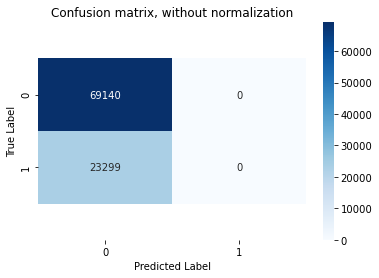

In [12]:
%%time
pred_null = null.predict(X_test)
conf_matrix(Y_test, pred_null)
print(classification_report(Y_test,pred_null))

__Modelo Logit:__

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     69140
         1.0       0.74      0.88      0.81     23299

    accuracy                           0.89     92439
   macro avg       0.85      0.89      0.87     92439
weighted avg       0.90      0.89      0.90     92439

Wall time: 670 ms


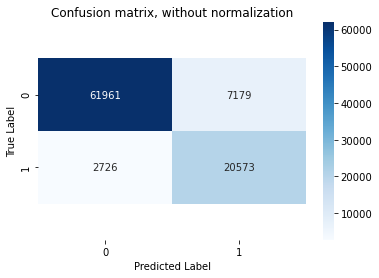

In [14]:
%%time
pred_logit = logit.predict(X_test)
conf_matrix(Y_test, pred_logit)
print(classification_report(Y_test,pred_logit))

__Modelo SVM:__

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     69140
         1.0       0.82      0.80      0.81     23299

    accuracy                           0.90     92439
   macro avg       0.87      0.87      0.87     92439
weighted avg       0.90      0.90      0.90     92439

Wall time: 9min 27s


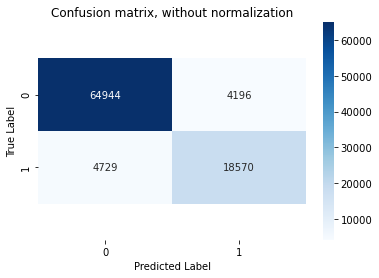

In [16]:
%%time
pred_svm= svm.predict(X_test)
conf_matrix(Y_test, pred_svm)
print(classification_report(Y_test,pred_svm))

__Modelo Random Forest:__

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     69140
         1.0       0.81      0.81      0.81     23299

    accuracy                           0.91     92439
   macro avg       0.87      0.88      0.87     92439
weighted avg       0.91      0.91      0.91     92439

Wall time: 8.51 s


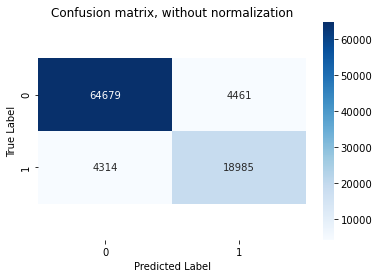

In [18]:
%%time
pred_rf= random_forest.predict(X_test)
conf_matrix(Y_test, pred_rf)
print(classification_report(Y_test,pred_rf))

__Modelo XG BOOST:__

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     69140
         1.0       0.81      0.80      0.81     23299

    accuracy                           0.90     92439
   macro avg       0.87      0.87      0.87     92439
weighted avg       0.90      0.90      0.90     92439

Wall time: 1.81 s


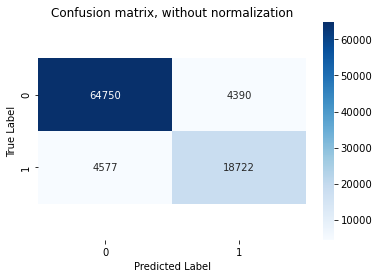

In [20]:
%%time
pred_xgb= xg_boost.predict(X_test)
conf_matrix(Y_test, pred_xgb)
print(classification_report(Y_test,pred_xgb))

### Curva ROC:

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
 - Tasa de verdaderos positivos
 - Tasa de falsos positivos
 
__El AUC__ proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

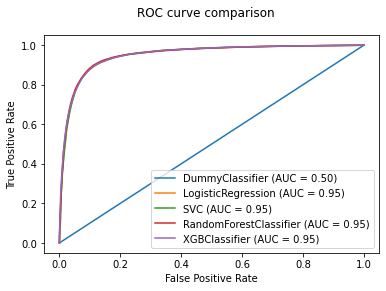

In [33]:
null_disp = metrics.plot_roc_curve(null, X_test, Y_test) # ROC null_model
logit_disp = metrics.plot_roc_curve(logit, X_test, Y_test ,ax=null_disp.ax_) # ROC logit_model mismos ejes que el roc null_model
svm_disp = metrics.plot_roc_curve(svm, X_test, Y_test, ax=null_disp.ax_) # ROC svm mismos ejes que el roc null_model
rf_disp = metrics.plot_roc_curve(random_forest, X_test, Y_test, ax=null_disp.ax_) # ROC random_forest sames axes roc null_model
xgb_disp = metrics.plot_roc_curve(xg_boost, X_test, Y_test, ax=null_disp.ax_) # ROC XG_BOOST mismos ejes que el roc null_model
null_disp.figure_.suptitle("ROC curve comparison") # título
plt.show()

# MEJOR MODELO

Para seleccionar el mejor modelo hemos tenido en cuenta diferentes criterios. 
En primer lugar, hemos considerado el porcentanje de accuracy de los modelos. En los modelos Logit, SVM, Random Forest y XG BOOST, estas cifras son muy parecidas variando en todos los modelos menos del 5%. Por ello, vamos a atender a los valores de falsos positivos y falsos negativos. Para analizar estos datos es muy importante tener en cuenta el conocimiento de negocio. 
Hay que tener muy en cuenta el coste de los errores.
En este caso, según hemos estudiado, las empresas encargadas de dar créditos tienen como objetivo reducir el número de impagos, por eso, en estos modelos querrán reducir al máximo el valor de los predecidos como 'fully_paid' pero que en realidad pertenecen a una categoría de impago. Atendiendo a este criterio los dos modelos que menos falsos negativos tienen son el modelo logístico y el modelo random forest.

Analizando pormenorizadamente cada modelo observamos que el modelo logit tiene menor número de falsos 'fully_paid' sin embargo, observamos que es muy elevada la cifra de clientes que categoriza como 'impagos' que en realidad no lo son. Siguiendo este criterio la entidad prestamista estaría dejando de dar muchos créditos con los que sí que obtendría beneficios. 

Creemos que es mejor la situación que proporciona el Random_forest que tiene es el segundo valor más bajo de clientes que no pagarán el crédito y además permitirá al prestamista ajustar y poder dar un mayor número de créditos a clientes que harán los pagos completos. Por lo que nuestro __mejor modelo es el Random Forest.__

A continuación, vamos a proceder a estimar los mejores hiperparámetros para el modelo Random Forest:

__Hiperparámetros:__

Definimos los mejores hperparámetros para nuestro mejor modelo. Esto en pricipio, permitirá optimizar el modelo mejorando así su aaplicación.


In [12]:
%%time
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'n_estimators': [200, 500]
 }

gsearch_RandomForest = GridSearchCV(estimator = RandomForestClassifier(500), 
                                    param_grid = param_grid, 
                                    scoring = 'roc_auc',
                                    n_jobs = -1, 
                                    iid = False, 
                                    cv = 3)

gsearch_RandomForest.fit(X_train, Y_train)

C:\Users\Beatriz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\Beatriz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1h 12min 30s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='roc_auc')

In [13]:
gsearch_RandomForest.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 500}

In [14]:

gsearch_RandomForest.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [15]:
%%time
gsearch_RandomForest2 = gsearch_RandomForest.best_estimator_
gsearch_RandomForest2.fit(X_train, Y_train)

<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 11min 15s


RandomForestClassifier(criterion='entropy', n_estimators=500)

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     69140
         1.0       0.81      0.81      0.81     23299

    accuracy                           0.90     92439
   macro avg       0.87      0.87      0.87     92439
weighted avg       0.90      0.90      0.90     92439

Wall time: 12.5 s


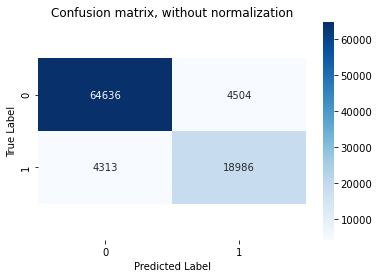

In [18]:
%%time
pred_param = gsearch_RandomForest2.predict(X_test)
conf_matrix(Y_test, pred_param)
print(classification_report(Y_test ,pred_param))

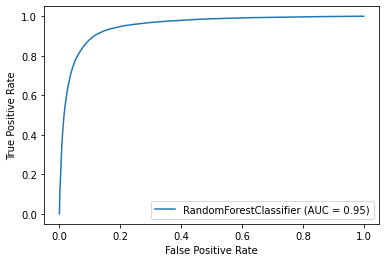

Random Forest score train:  1.0
Random Forest score:  0.9046181806380423


In [19]:
metrics.plot_roc_curve(gsearch_RandomForest2, X_test, Y_test)                       # CURVA ROC
plt.show() 
print("Random Forest score train: ", gsearch_RandomForest2.score(X_train, Y_train)) # score_train
print("Random Forest score: ", gsearch_RandomForest2.score(X_test, Y_test))         # score_test

In [22]:
# función para guardar el modelo
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [23]:
save_models('../data/04_models/rf_param.pkl', gsearch_RandomForest2) # ruta y modelo guradado IMP .plk

### Conclusiones:

El objetivo de este estudio era la estimación de diferentes modelos a partir de la base de datos aportada. Hemos llevado a cabo un análisis pormenorizado cada una de las variables realizando los ajustes pertinentes para proceder a la modelización. Este ha incluido un análisis exploratorio e ingeniería de variables. A continuación hemos definido y entrenado los diferentes modelos: modelo nulo, modelo logit, SVM, random forest y XGBOOST. Después de analizar los indicadores más relevantes de cada modelo, como la precisión, y teniendo en cuenta el conocimiento de negocio, hemos concluido que el modelo óptimo es el random forest. Seguidamente, hemos ajustado los hiperparámetros del modelo. Aunque no se ha conseguido aumentar la precisión, se ha obtenido la redución del número de falsos positivos, que es el objetivo de las entidades prestamistas.

Para concluir, nos gustaría destacar la importancia y dificultad del proceso de limpieza y selección de variables, siendo esencial el conocimiento de negocio, tanto para estas tareas, como para la selección del modelo óptimo.

### Referencias:
- https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624
- https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://empresas.blogthinkbig.com/ml-a-tu-alcance-matriz-confusion/
- https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/
- https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/